#### Example for sampling distribution

Take 1000 samples of 20 measurements each and plot as histogram

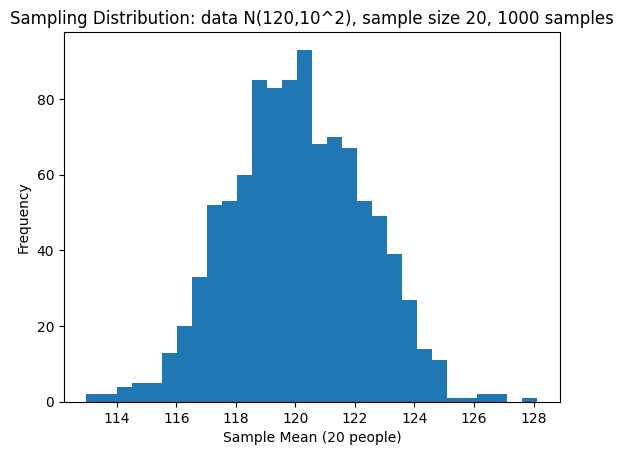

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Population with mean = 120, sd = 10
np.random.seed(42) # set seed for randomizer in np
population = np.random.normal(120, 10, 100000)

sample_means = [np.mean(np.random.choice(population, 20)) for i in range(1000)]

plt.hist(sample_means, bins=30)
plt.xlabel("Sample Mean (20 people)")
plt.ylabel("Frequency")
plt.title("Sampling Distribution: data N(120,10^2), sample size 20, 1000 samples")
plt.show()

#### ttest and confidence intervals

Example: two groups of blood pressure measurements with and without medication.

In [ ]:
import numpy as np
from scipy import stats

# --- Simulated data ---
np.random.seed(42)
control = np.random.normal(110, 10, 20) # takes 20 random samples from a normal distribution N(100,10)
treatment = np.random.normal(120, 10, 20)

def ttest_ci(group1, group2, alpha=0.05, equal_var=True):
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = np.mean(group1), np.mean(group2)
    sd1, sd2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    se = np.sqrt(sd1**2/n1 + sd2**2/n2) # calculation of standard error
    
    # calculate degrees of freedom (Welch's t-test for unequal variance)
    if equal_var:
        df = n1 + n2 - 2
    else:
        df = (sd1**2/n1 + sd2**2/n2)**2 / ((sd1**2/n1)**2/(n1-1) + (sd2**2/n2)**2/(n2-1))
    
    t_crit = stats.t.ppf(1 - alpha/2, df) # calculate t-critical that cuts off at 1-alpha/2 (symmetrical distribution)

    diff = mean1 - mean2 # difference of means
    ci = (diff - t_crit*se, diff + t_crit*se) # confidence interval for difference of means
    return diff, ci, df

diff, ci, df = ttest_ci(treatment, control)
print(f"Mean difference = {diff:.2f}, 95% CI = [{ci[0]:.2f}, {ci[1]:.2f}], df = {df:.0f}")

# actual t-test
t_value, p_value = stats.ttest_ind(treatment, control, equal_var=True, nan_policy="omit")
print(f"t_value = {t_value:.2f}, p_value = {p_value:.6f}")


3.0485681167677416 2.1646003586619096 2.14668881066948
Mean difference = 9.05, 95% CI = [2.88, 15.22], df = 38
t_value = 2.97, p_value = 0.005142


#### Example ANOVA

In [ ]:
import pandas as pd
from scipy import stats

# Example data: reaction yields at different pH values
data = {
    "pH5": [22, 25, 19, 23, 20],
    "pH7": [30, 32, 29, 31, 33],
    "pH9": [18, 21, 17, 19, 20]
}

df = pd.DataFrame(data)

# One-way ANOVA
f_stat, p_value = stats.f_oneway(df["pH5"], df["pH7"], df["pH9"])

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Significant difference between groups (reject H₀).")
else:
    print("No significant difference (fail to reject H₀).")


ANOVA Results:
F-statistic: 55.252
P-value: 0.0000
Significant difference between groups (reject H₀).


#### Example Chi-Square test of independence

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table: rows = drug, columns = cell response
data = pd.DataFrame({
    "alive": [30, 10],  # Drug X
    "dead": [20, 20]   # Drug Y
}, index=["Drug X", "Drug Y"])
print(data, "\n")

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-square Test Results:")
print(f"Chi2 statistic: {chi2:.3f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Significant association between drug and cell response (reject H₀).")
else:
    print("No significant association (fail to reject H₀).")


        alive  dead
Drug X     30    20
Drug Y     10    20 

Chi-square Test Results:
Chi2 statistic: 4.320
P-value: 0.0377
Degrees of freedom: 1
Expected frequencies:
 [[25. 25.]
 [15. 15.]]
Significant association between drug and cell response (reject H₀).


#### Example Pearson's correlation

In [27]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Example data
data = {
    "Concentration_mM": [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    "Reaction_rate": [2.1, 3.8, 5.2, 7.1, 8.0, 9.5]
}

df = pd.DataFrame(data)

# Pearson correlation
corr_coef, p_value = pearsonr(df["Concentration_mM"], df["Reaction_rate"])

print("Pearson Correlation Results:")
print(f"Correlation coefficient (r): {corr_coef:.3f}")
print(f"P-value: {p_value:.4f}")



Pearson Correlation Results:
Correlation coefficient (r): 0.997
P-value: 0.0000
